In [1]:
!nvidia-smi

Fri May 28 02:06:57 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    On   | 00000000:01:00.0  On |                  N/A |
| N/A   62C    P0    53W /  N/A |    397MiB /  8111MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
if not os.path.isdir('keras-retinanet'):
    !git clone https://github.com/fizyr/keras-retinanet.git

In [3]:
#!pip install --upgrade keras

In [4]:
%cd keras-retinanet
!ls

/home/skycam/sample_projs/FRCNN/RetinaNet_Fabric_Defect/keras-retinanet
 alldata.csv	       examples		 out		    snapshots
 annotations.csv       keras_retinanet	 README.md	    tests
 build		       keras-retinanet	 requirements.txt   xml2csv.py
'classes (copy).csv'   LICENSE		 setup.cfg
 classes.csv	       maskdb		 setup.py


In [5]:

!ls
if 1: #make this 1 and run only on very first time
    !pip install .
    !python setup.py build_ext --inplace
    !pip install gdown
    !pip install tensorflow

 alldata.csv	       examples		 out		    snapshots
 annotations.csv       keras_retinanet	 README.md	    tests
 build		       keras-retinanet	 requirements.txt   xml2csv.py
'classes (copy).csv'   LICENSE		 setup.cfg
 classes.csv	       maskdb		 setup.py
Processing /home/skycam/sample_projs/FRCNN/RetinaNet_Fabric_Defect/keras-retinanet
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp36-cp36m-linux_x86_64.whl size=167021 sha256=dbcef11fb70f7a505f2f90b26c9b8f9807b70d26c327e6f7c1819d8657a2688b
  Stored in directory: /home/skycam/.cache/pip/wheels/41/be/bf/78ae84d500171c1eb5c99440a

In [6]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import urllib
import os
import csv
import cv2
import time
from PIL import Image

from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [7]:
os.makedirs("snapshots", exist_ok=True)

In [8]:
#https://curiousily.com/posts/object-detection-on-custom-dataset-with-tensorflow-2-and-keras-using-python/
#https://colab.research.google.com/drive/1ldnii3sGJaUHPV6TWImykbeE_O-8VIIN#scrollTo=5DgiQ4FR0go6

In [9]:
os.makedirs("maskdb", exist_ok=True)

In [10]:
!python3 xml2csv.py

maskdb/train/c2r3e1n14_051.xml
xml to csv maskdb/train/c2r3e1n14_051.xml
maskdb/train/c2r2e1n2_226.xml
xml to csv maskdb/train/c2r2e1n2_226.xml
maskdb/train/c1r1e1n10_202.xml
xml to csv maskdb/train/c1r1e1n10_202.xml
maskdb/train/c1r1e1n33_177.xml
xml to csv maskdb/train/c1r1e1n33_177.xml
maskdb/train/c1r1e2n46_407.xml
xml to csv maskdb/train/c1r1e2n46_407.xml
maskdb/train/c1r3e1n20_130.xml
xml to csv maskdb/train/c1r3e1n20_130.xml
maskdb/train/c1r3e2n30_268.xml
xml to csv maskdb/train/c1r3e2n30_268.xml
maskdb/train/c2r2e2n45_190.xml
xml to csv maskdb/train/c2r2e2n45_190.xml
maskdb/train/c2r3e1n43_181.xml
xml to csv maskdb/train/c2r3e1n43_181.xml
maskdb/train/c2r3e2n36_382.xml
xml to csv maskdb/train/c2r3e2n36_382.xml
maskdb/train/c2r2e2n38_217.xml
xml to csv maskdb/train/c2r2e2n38_217.xml
maskdb/train/c2r2e1n38_128.xml
xml to csv maskdb/train/c2r2e1n38_128.xml
maskdb/train/c1r1e1n29_060.xml
xml to csv maskdb/train/c1r1e1n29_060.xml
maskdb/train/c2r3e2n37_378.xml
xml to csv maskdb/trai

maskdb/train/c1r3e2n25_275.xml
xml to csv maskdb/train/c1r3e2n25_275.xml
maskdb/train/c2r3e1n1_162.xml
xml to csv maskdb/train/c2r3e1n1_162.xml
maskdb/train/c2r2e1n35_019.xml
xml to csv maskdb/train/c2r2e1n35_019.xml
maskdb/train/c2r2e2n25_015.xml
xml to csv maskdb/train/c2r2e2n25_015.xml
maskdb/train/c1r3e1n41_221.xml
xml to csv maskdb/train/c1r3e1n41_221.xml
maskdb/train/c1r1e1n44_056.xml
xml to csv maskdb/train/c1r1e1n44_056.xml
maskdb/train/c2r2e1n39_077.xml
xml to csv maskdb/train/c2r2e1n39_077.xml
maskdb/train/c1r3e2n23_371.xml
xml to csv maskdb/train/c1r3e2n23_371.xml
maskdb/train/c2r3e2n22_339.xml
xml to csv maskdb/train/c2r3e2n22_339.xml
maskdb/train/c1r1e1n40_114.xml
xml to csv maskdb/train/c1r1e1n40_114.xml
maskdb/train/c2r3e1n34_078.xml
xml to csv maskdb/train/c2r3e1n34_078.xml
maskdb/train/c1r3e2n28_303.xml
xml to csv maskdb/train/c1r3e2n28_303.xml
maskdb/train/c2r3e1n50_075.xml
xml to csv maskdb/train/c2r3e1n50_075.xml
maskdb/train/c1r1e2n12_390.xml
xml to csv maskdb/trai

maskdb/train/c2r2e1n22_124.xml
xml to csv maskdb/train/c2r2e1n22_124.xml
maskdb/train/c1r3e1n5_198.xml
xml to csv maskdb/train/c1r3e1n5_198.xml
maskdb/train/c2r2e1n4_141.xml
xml to csv maskdb/train/c2r2e1n4_141.xml
maskdb/train/c1r1e2n14_359.xml
xml to csv maskdb/train/c1r1e2n14_359.xml
maskdb/train/c1r3e1n21_054.xml
xml to csv maskdb/train/c1r3e1n21_054.xml
maskdb/train/c2r2e1n3_204.xml
xml to csv maskdb/train/c2r2e1n3_204.xml
maskdb/train/c2r2e1n18_043.xml
xml to csv maskdb/train/c2r2e1n18_043.xml
maskdb/train/c2r2e1n20_022.xml
xml to csv maskdb/train/c2r2e1n20_022.xml
maskdb/train/c2r2e1n7_169.xml
xml to csv maskdb/train/c2r2e1n7_169.xml
maskdb/train/c1r3e2n40_271.xml
xml to csv maskdb/train/c1r3e2n40_271.xml
maskdb/train/c2r2e2n18_113.xml
xml to csv maskdb/train/c2r2e2n18_113.xml
maskdb/train/c2r3e2n17_345.xml
xml to csv maskdb/train/c2r3e2n17_345.xml
maskdb/train/c2r3e1n39_032.xml
xml to csv maskdb/train/c2r3e1n39_032.xml
maskdb/train/c1r1e1n48_004.xml
xml to csv maskdb/train/c1r1

maskdb/train/c2r3e1n43_059.xml
xml to csv maskdb/train/c2r3e1n43_059.xml
maskdb/train/c1r3e1n33_002.xml
xml to csv maskdb/train/c1r3e1n33_002.xml
maskdb/train/c2r3e1n23_097.xml
xml to csv maskdb/train/c2r3e1n23_097.xml
maskdb/train/c1r3e2n19_354.xml
xml to csv maskdb/train/c1r3e2n19_354.xml
maskdb/train/c2r3e2n33_408.xml
xml to csv maskdb/train/c2r3e2n33_408.xml
maskdb/train/c2r3e1n47_035.xml
xml to csv maskdb/train/c2r3e1n47_035.xml
maskdb/train/c2r2e2n29_272.xml
xml to csv maskdb/train/c2r2e2n29_272.xml
xml_df                           image_name  x_min  y_min  x_max  y_max class_name
0     maskdb/train/c2r3e1n14_051.tif    240    169    391    291       Line
1     maskdb/train/c2r3e1n14_051.tif     27    144     52    165       Hole
2     maskdb/train/c2r3e1n14_051.tif     92    159    117    174       Hole
3     maskdb/train/c2r3e1n14_051.tif    126    328    151    354       Hole
4     maskdb/train/c2r3e1n14_051.tif    214    279    235    303       Hole
...                       

In [11]:
df = pd.read_csv('alldata.csv')
df.head()

image_name  x_min  y_min  x_max  y_max class_name
0  maskdb/train/c2r3e1n14_051.tif    240    169    391    291       Line
1  maskdb/train/c2r3e1n14_051.tif     27    144     52    165       Hole
2  maskdb/train/c2r3e1n14_051.tif     92    159    117    174       Hole
3  maskdb/train/c2r3e1n14_051.tif    126    328    151    354       Hole
4  maskdb/train/c2r3e1n14_051.tif    214    279    235    303       Hole

In [12]:
df.iloc[0]

image_name    maskdb/train/c2r3e1n14_051.tif
x_min                                    240
y_min                                    169
x_max                                    391
y_max                                    291
class_name                              Line
Name: 0, dtype: object

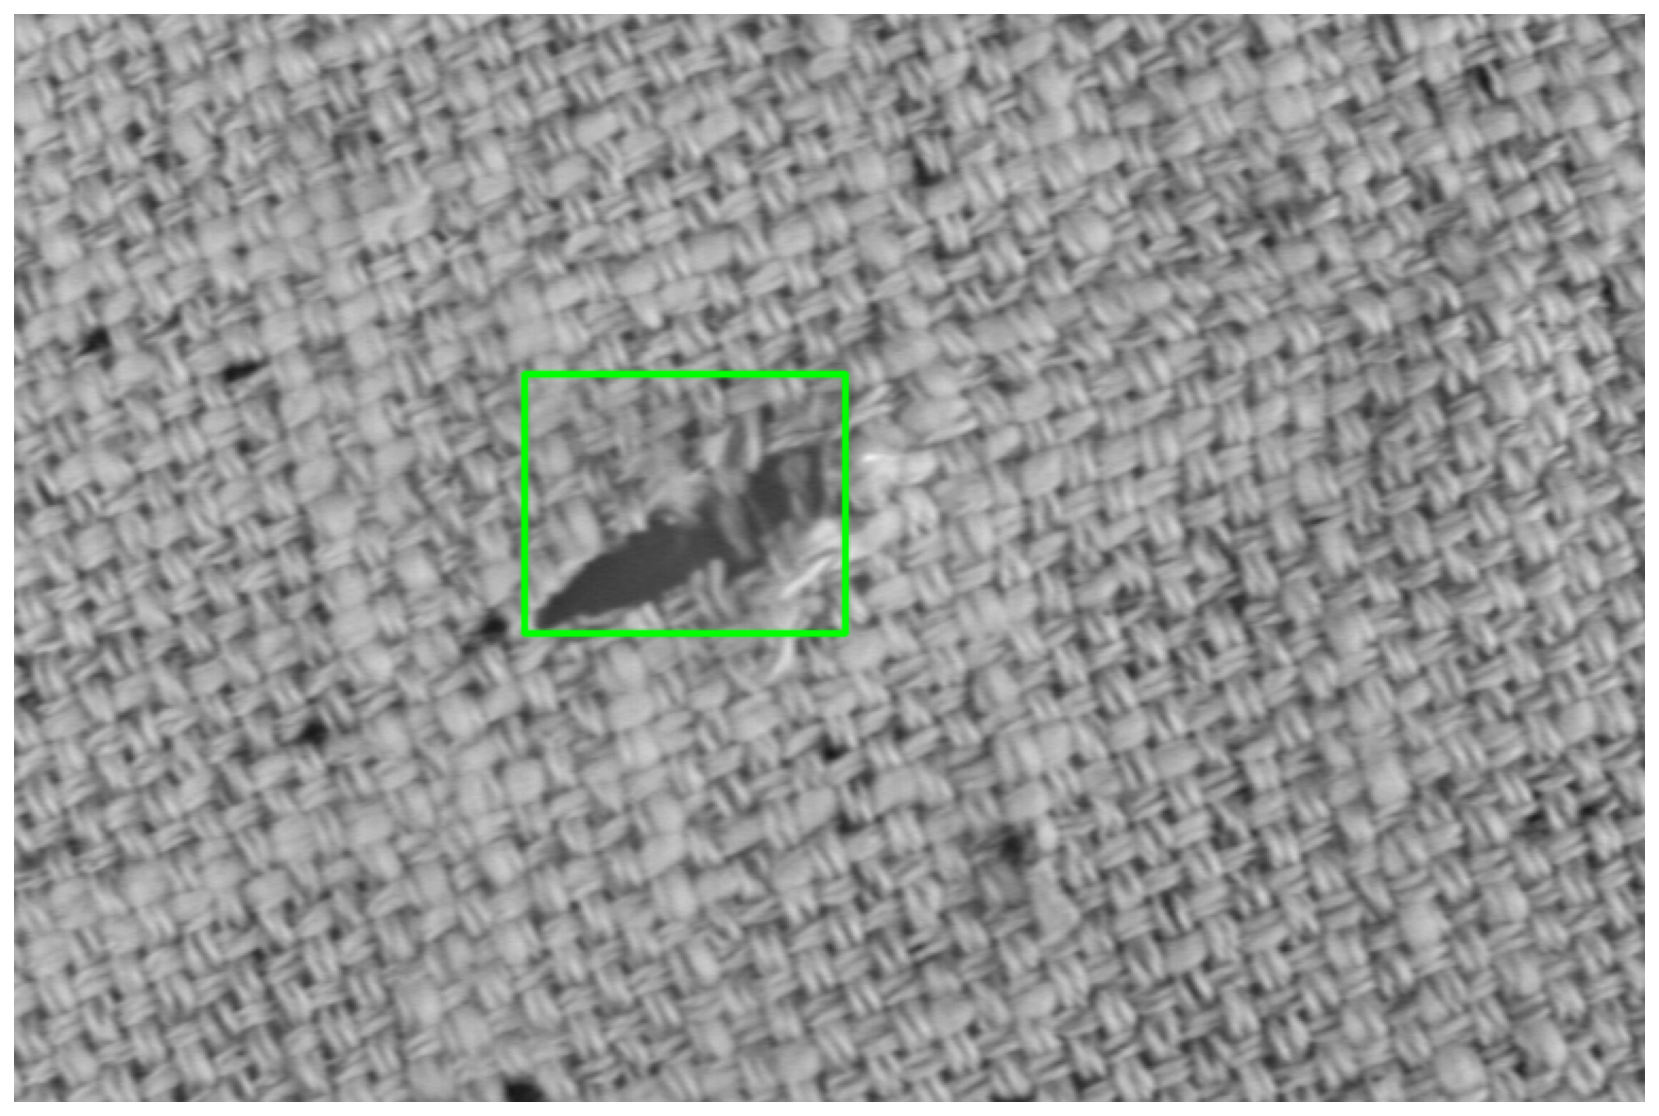

In [13]:
def show_image_objects(image_row):

    img_path = image_row.image_name
    box = [
    image_row.x_min, image_row.y_min, image_row.x_max, image_row.y_max
    ]

    image = cv2.imread(img_path)

    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    draw_box(draw, box, color=(0, 255, 0))

    plt.axis('off')
    plt.imshow(draw)
    plt.show()
show_image_objects(df.iloc[0])

In [14]:
df

image_name  x_min  y_min  x_max  y_max class_name
0     maskdb/train/c2r3e1n14_051.tif    240    169    391    291       Line
1     maskdb/train/c2r3e1n14_051.tif     27    144     52    165       Hole
2     maskdb/train/c2r3e1n14_051.tif     92    159    117    174       Hole
3     maskdb/train/c2r3e1n14_051.tif    126    328    151    354       Hole
4     maskdb/train/c2r3e1n14_051.tif    214    279    235    303       Hole
...                              ...    ...    ...    ...    ...        ...
1231  maskdb/train/c2r3e1n47_035.tif    316    189    348    212       Hole
1232  maskdb/train/c2r3e1n47_035.tif     51    254     74    278       Hole
1233  maskdb/train/c2r3e1n47_035.tif    604    275    635    302       Hole
1234  maskdb/train/c2r3e1n47_035.tif    591    460    630    489       Hole
1235  maskdb/train/c2r2e2n29_272.tif    124     33    338    263      Stain

[1236 rows x 6 columns]

In [15]:
os.path.join(os.getcwd() ,df.iloc[0].image_name)

'/home/skycam/sample_projs/FRCNN/RetinaNet_Fabric_Defect/keras-retinanet/maskdb/train/c2r3e1n14_051.tif'

In [16]:
#!ls
print(df.iloc[0])
img = cv2.imread(os.path.join(os.getcwd() ,df.iloc[0].image_name),1)

df.iloc[0].image_name
img.shape

image_name    maskdb/train/c2r3e1n14_051.tif
x_min                                    240
y_min                                    169
x_max                                    391
y_max                                    291
class_name                              Line
Name: 0, dtype: object


(512, 768, 3)

In [17]:
!ls
df.iloc[0].image_name

 alldata.csv	       examples		 out		    snapshots
 annotations.csv       keras_retinanet	 README.md	    tests
 build		       keras-retinanet	 requirements.txt   xml2csv.py
'classes (copy).csv'   LICENSE		 setup.cfg
 classes.csv	       maskdb		 setup.py


'maskdb/train/c2r3e1n14_051.tif'

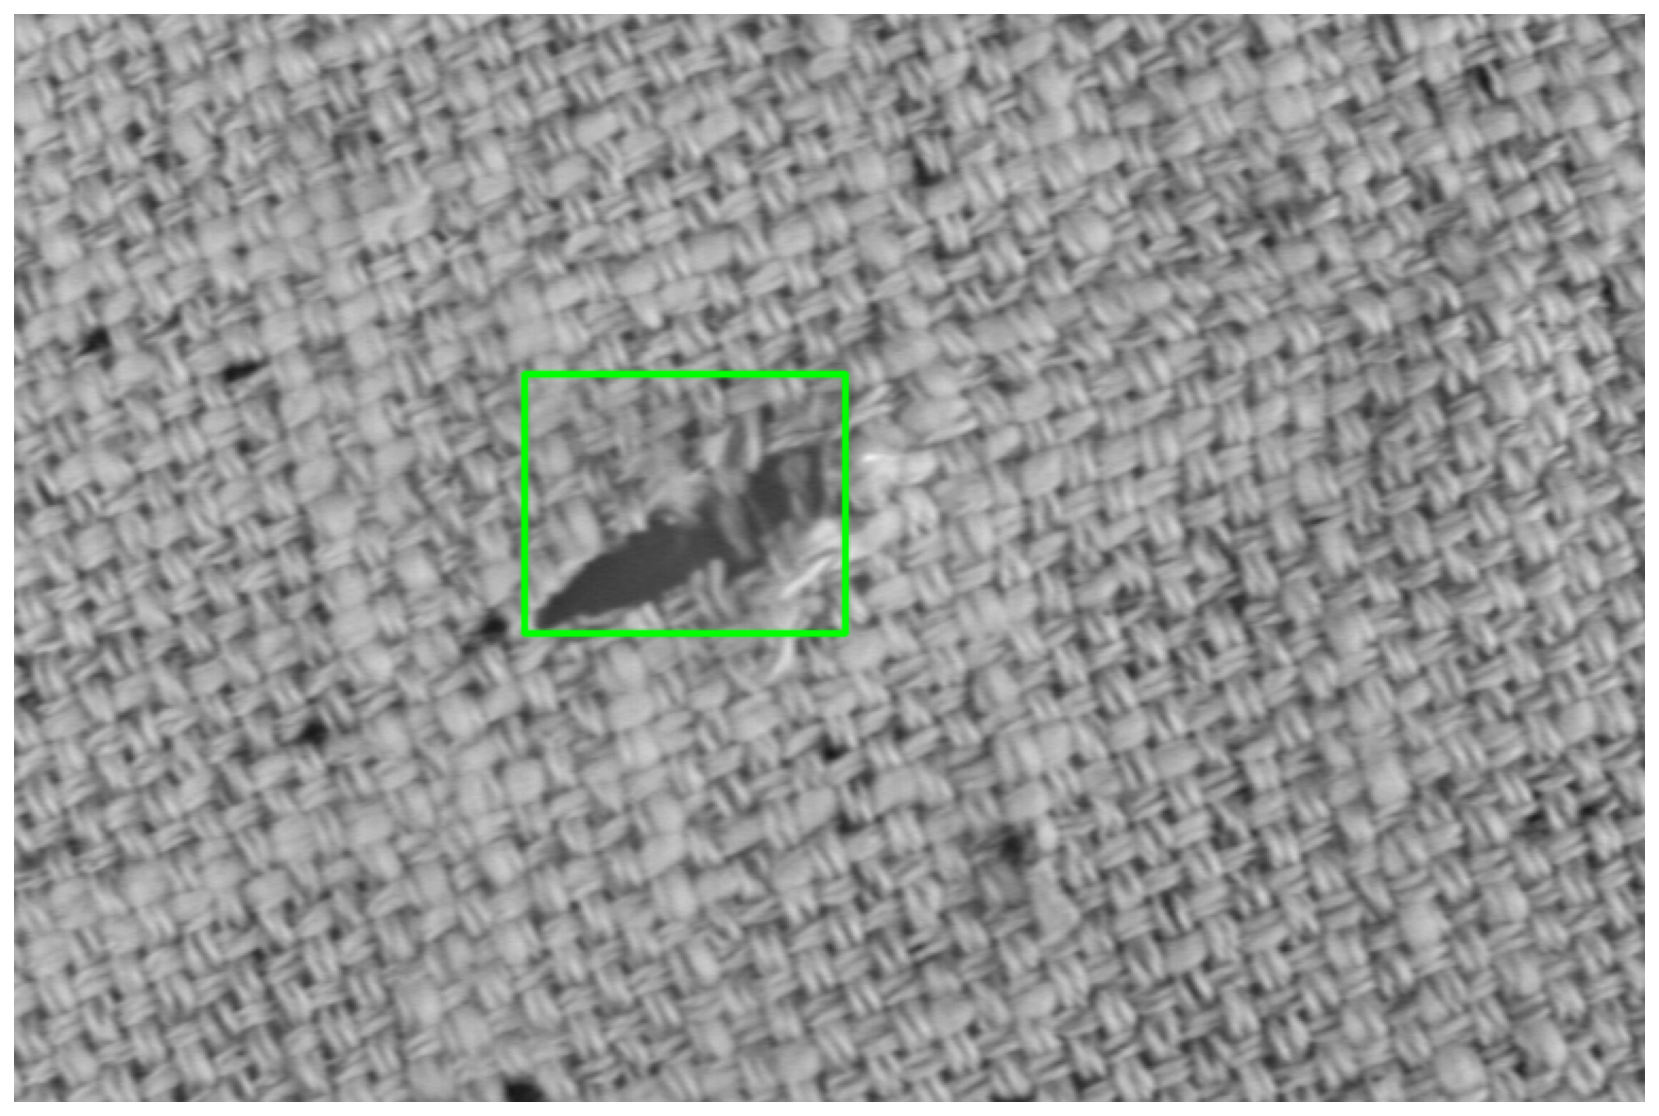

In [18]:
show_image_objects(df.iloc[0])

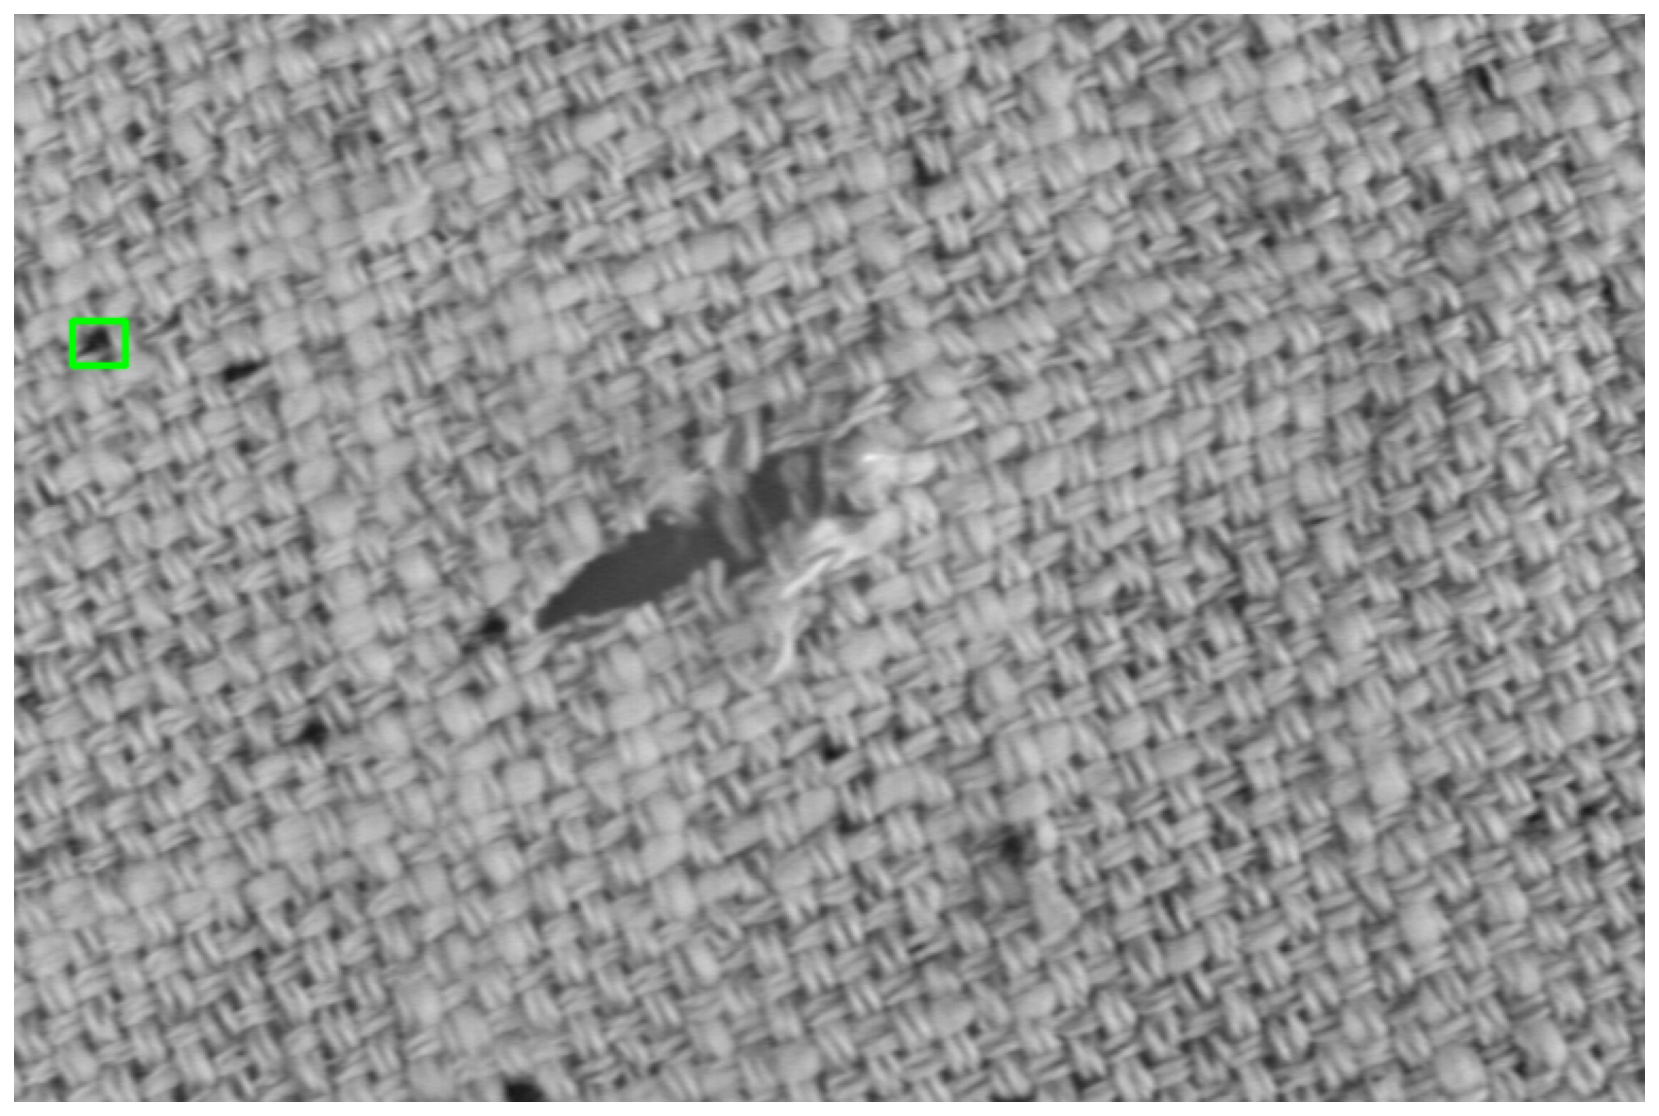

In [19]:
show_image_objects(df.iloc[1])

# Preprocessing

In [20]:
train_df, test_df = train_test_split(
  df, 
  test_size=0.2, 
  random_state=RANDOM_SEED
)

In [21]:
ANNOTATIONS_FILE = 'annotations.csv'
CLASSES_FILE = 'classes.csv'

In [22]:
train_df

image_name  x_min  y_min  x_max  y_max class_name
946    maskdb/train/c2r2e2n8_273.tif     17      1    289     79      Stain
394   maskdb/train/c2r3e2n13_288.tif    382    416    424    456       Hole
1023  maskdb/train/c2r3e1n46_072.tif     35     15    307    270       Line
816   maskdb/train/c2r3e1n39_032.tif    744    339    757    370       Hole
88    maskdb/train/c1r1e2n25_374.tif      1    389     29    418      Stain
...                              ...    ...    ...    ...    ...        ...
1044  maskdb/train/c1r1e2n50_349.tif      1    384     32    412      Stain
1095   maskdb/train/c1r3e2n3_248.tif      1    386     21    409      Stain
1130   maskdb/train/c2r3e1n4_187.tif    171    477    208    496       Hole
860    maskdb/train/c2r3e2n8_231.tif      1    456     54    503       Hole
1126   maskdb/train/c2r3e1n6_199.tif    299    125    317    139       Hole

[988 rows x 6 columns]

In [23]:
train_df.to_csv(ANNOTATIONS_FILE, index=False, header=None)

In [24]:
!head classes.csv

Stain,0
Hole,1
Line,2


In [25]:
!head annotations.csv

maskdb/train/c2r2e2n8_273.tif,17,1,289,79,Stain
maskdb/train/c2r3e2n13_288.tif,382,416,424,456,Hole
maskdb/train/c2r3e1n46_072.tif,35,15,307,270,Line
maskdb/train/c2r3e1n39_032.tif,744,339,757,370,Hole
maskdb/train/c1r1e2n25_374.tif,1,389,29,418,Stain
maskdb/train/c2r3e1n24_026.tif,624,405,645,439,Hole
maskdb/train/c2r3e1n41_161.tif,637,460,660,490,Hole
maskdb/train/c2r3e2n43_328.tif,396,45,432,81,Hole
maskdb/train/c2r3e2n35_294.tif,738,113,763,161,Hole
maskdb/train/c1r3e1n41_221.tif,415,410,516,512,Hole


# Training

In [26]:
if 1:
    PRETRAINED_MODEL = './snapshots/resnet50_csv_.h5'
    if not os.path.isfile(PRETRAINED_MODEL):
        PRETRAINED_MODEL = './snapshots/_pretrained_model.h5'
        if not os.path.isfile(PRETRAINED_MODEL):
            URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
            urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)
            print('Downloaded pretrained model to ' + PRETRAINED_MODEL)
        

In [27]:
!pip3 install progressbar2

In [ ]:
if 1:#make this one and run to train again
    !keras_retinanet/bin/train.py --freeze-backbone --compute-val-loss --random-transform --weights {PRETRAINED_MODEL} --batch-size 4 --steps 10 --epochs 10 csv annotations.csv classes.csv   --val-annotations annotations.csv       

2021-05-28 02:07:14.158598: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Creating model, this may take a second...
2021-05-28 02:07:15.879152: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-28 02:07:15.879873: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-28 02:07:15.908077: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-28 02:07:15.908455: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 1080 computeCapability: 6.1
coreClock: 1.771GHz coreCount: 20 deviceMemorySize: 7.92GiB deviceMemoryBandwidth: 298.32GiB/s
2021-05-28 02:07:15.908477: I ten

bn4a_branch2a (BatchNormalizati (None, None, None, 2 1024        res4a_branch2a[0][0]             
__________________________________________________________________________________________________
res4a_branch2a_relu (Activation (None, None, None, 2 0           bn4a_branch2a[0][0]              
__________________________________________________________________________________________________
padding4a_branch2b (ZeroPadding (None, None, None, 2 0           res4a_branch2a_relu[0][0]        
__________________________________________________________________________________________________
res4a_branch2b (Conv2D)         (None, None, None, 2 589824      padding4a_branch2b[0][0]         
__________________________________________________________________________________________________
bn4a_branch2b (BatchNormalizati (None, None, None, 2 1024        res4a_branch2b[0][0]             
__________________________________________________________________________________________________
res4a_bran

2021-05-28 02:07:19.621732: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-05-28 02:07:19.641389: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2799925000 Hz
Epoch 1/10
2021-05-28 02:07:24.978856: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2021-05-28 02:07:25.920275: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-05-28 02:07:26.140730: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
10/10 [==============================] - 46s 4s/step - loss: 2.8241 - regression_loss: 2.1729 - classification_loss: 0.6512 - val_loss: 2.6783 - val_regression_loss: 2.0223 - val_classification_loss: 0.6561
Running network: 100% (358 of 358) |#####| Elapsed Time: 0:00:48 Time:  0:00:4

# Loading the trained model

In [29]:
!ls snapshots

_pretrained_model.h5  resnet50_csv_.h5


In [30]:
model_path = os.path.join('snapshots', sorted(os.listdir('snapshots'), reverse=True)[0])
print(model_path)

model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)

labels_to_names = pd.read_csv(CLASSES_FILE, header=None).T.loc[0].to_dict()

snapshots/resnet50_csv_.h5


# Predictions

In [31]:
def predict(image):
  image = preprocess_image(image.copy())
  image, scale = resize_image(image)

  boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(image, axis=0)
  )

  boxes /= scale

  return boxes, scores, labels

In [32]:
THRES_SCORE = 0.2

def draw_detections(image, boxes, scores, labels):
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    if score > THRES_SCORE:
        #break

        color = label_color(label)
        #print('label',label)
        b = box.astype(int)
        draw_box(image, b, color=color)

        caption = "{} {:.3f}".format(labels_to_names[label], score)
        draw_caption(image, b, caption)

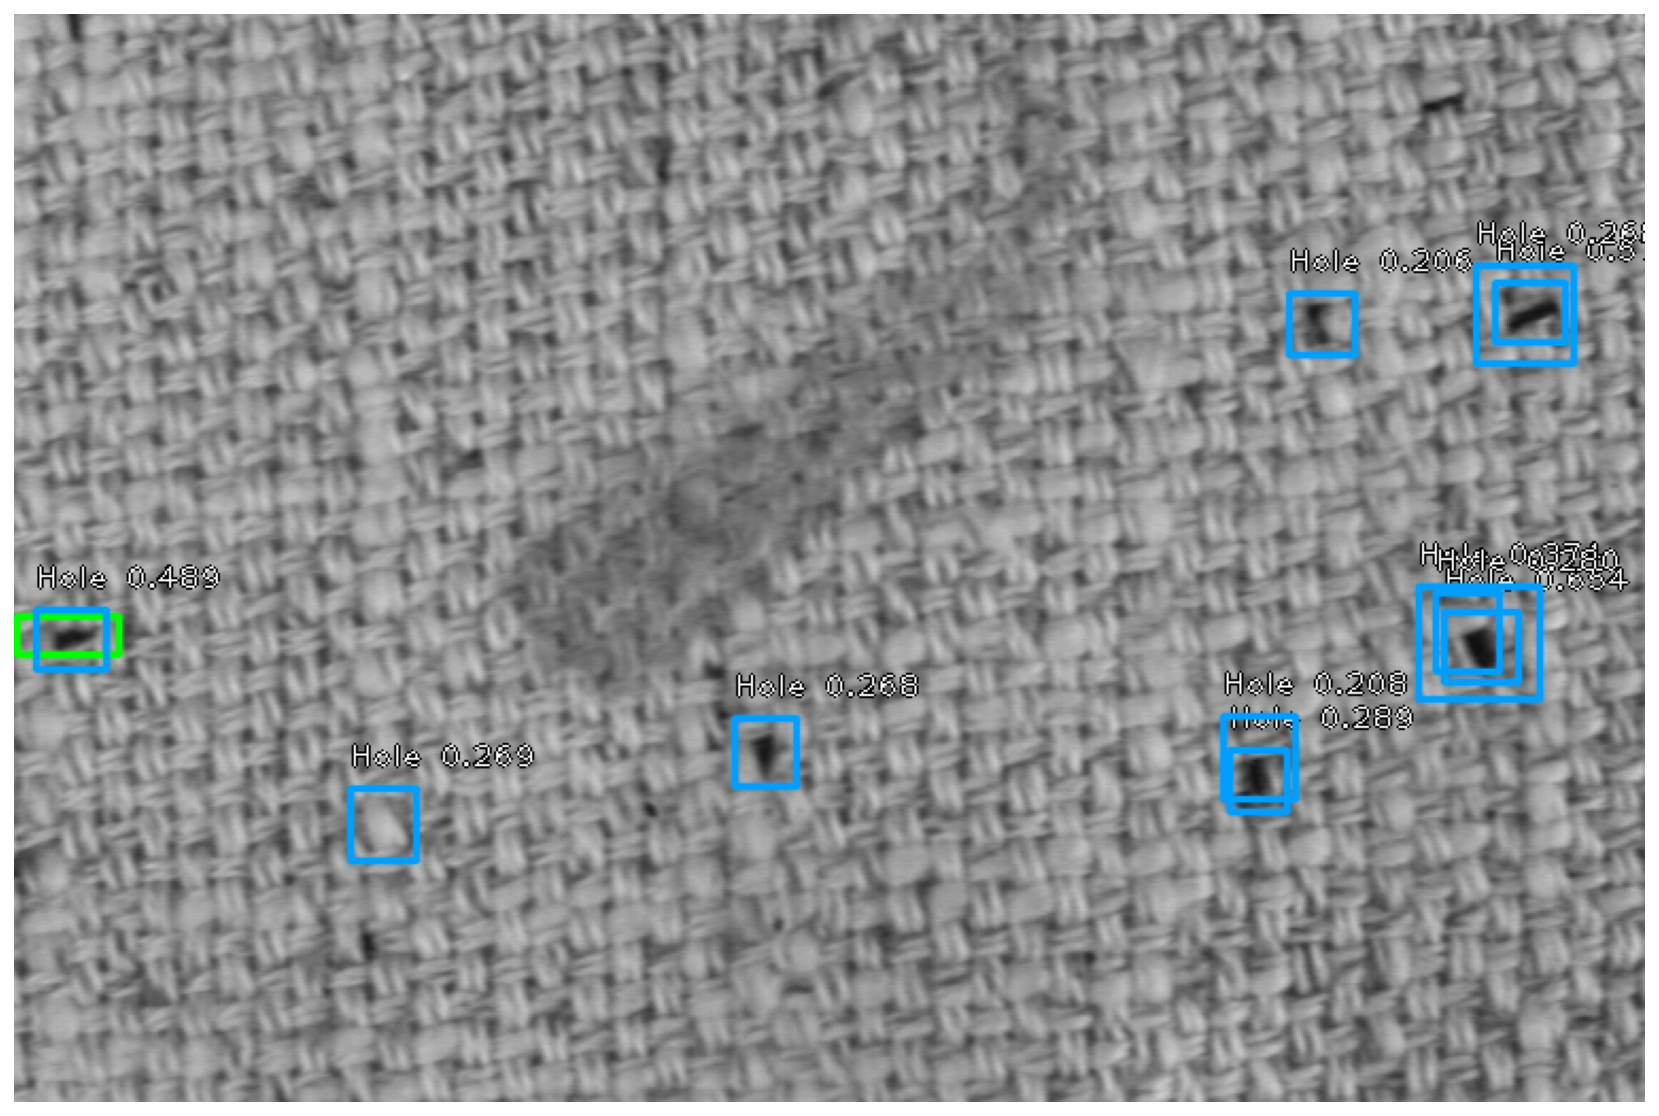

In [33]:
def show_detected_objects(image_row):
    img_path = image_row.image_name

    image = read_image_bgr(img_path)

    boxes, scores, labels = predict(image)
    #import pdb;pdb.set_trace()

    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    true_box = [
    image_row.x_min, image_row.y_min, image_row.x_max, image_row.y_max
    ]
    draw_box(draw, true_box, color=(0, 255, 0))

    draw_detections(draw, boxes, scores, labels)

    plt.axis('off')
    plt.imshow(draw)
    plt.show()
show_detected_objects(test_df.iloc[0])

In [34]:
test_df.head(n=10)

image_name  x_min  y_min  x_max  y_max class_name
292   maskdb/train/c2r3e2n11_367.tif      1    283     49    301       Hole
630   maskdb/train/c1r1e2n44_262.tif    672     82    725    160      Stain
1200  maskdb/train/c2r3e1n43_059.tif    124    114    138    136       Hole
113    maskdb/train/c2r3e1n3_203.tif    112    152    128    174       Hole
174   maskdb/train/c2r3e2n34_252.tif    449    220    479    251       Hole
422    maskdb/train/c2r3e1n1_162.tif     98    167    125    186       Hole
760   maskdb/train/c2r3e1n38_173.tif    221    210    405    280       Hole
506   maskdb/train/c1r3e1n43_085.tif    268    448    379    512       Hole
1077  maskdb/train/c2r3e2n50_237.tif    199     35    251     71       Hole
1055  maskdb/train/c2r3e1n40_225.tif    513    325    556    371       Hole

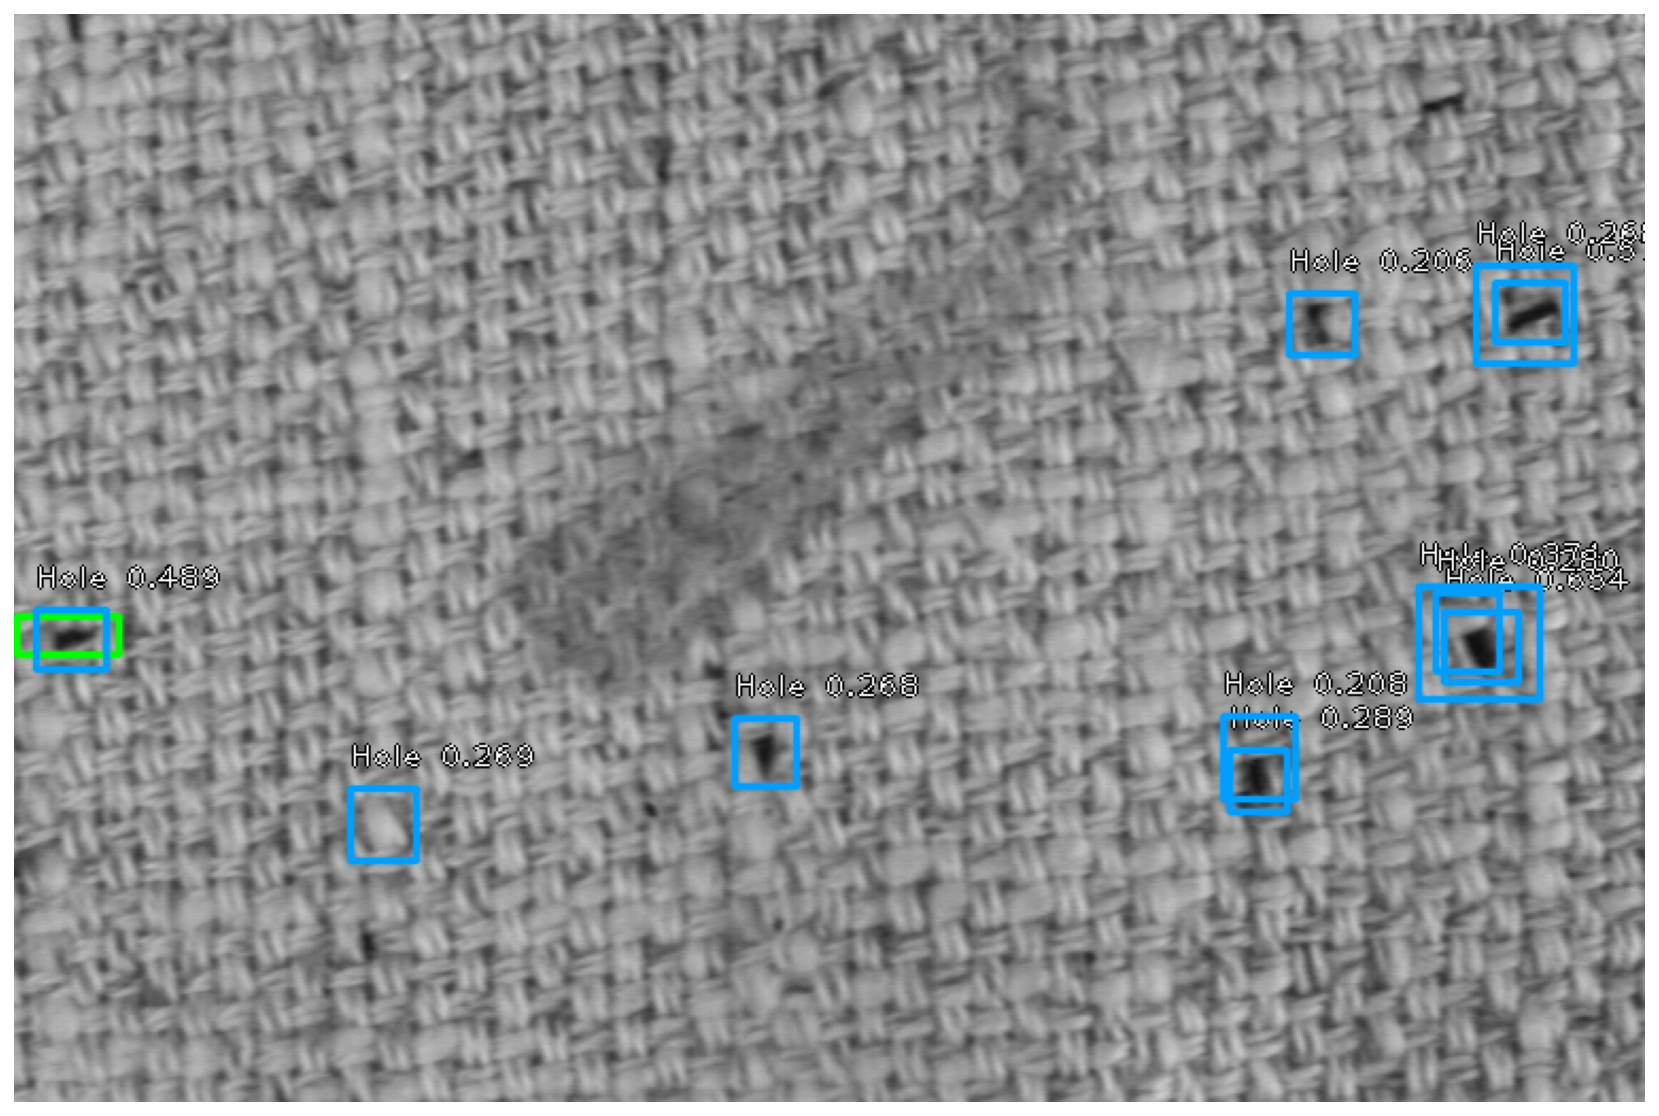

In [35]:
show_detected_objects(test_df.iloc[0])

In [36]:
#show_detected_objects(test_df.iloc[1])

In [37]:
#show_detected_objects(test_df.iloc[2])